In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
cd = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')
tr = pd.read_excel('KPMG.xlsx', sheet_name='Transactions')
ca = pd.read_excel('KPMG.xlsx', sheet_name='CustomerAddress')

## Customer Demographic

### Explore the data

In [3]:
cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
cd.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [5]:
# drop default column

In [6]:
cd.default.value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
â°â´âµâââ                                  53
                                         ... 
'"''''"                                    31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

In [7]:
cd = cd.drop(columns = 'default')

In [8]:
cd.shape

(4000, 12)

In [9]:
cd.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0


#### Check for duplicate values

In [10]:
cd.duplicated().sum()

0

#### Info table about the data

In [11]:
cd_info=pd.DataFrame(cd.dtypes).T.rename(index={0:'column type'})
cd_info=cd_info.append(pd.DataFrame(cd.isnull().sum()).T.rename(index={0:'null values (nb)'}))
cd_info=cd_info.append(pd.DataFrame(cd.isnull().sum()/cd.shape[0]*100).T.rename(index={0:'null values (%)'}))
cd_info

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
column type,int64,object,object,object,int64,datetime64[ns],object,object,object,object,object,float64
null values (nb),0,0,125,0,0,87,506,656,0,0,0,87
null values (%),0.0,0.0,3.125,0.0,0.0,2.175,12.65,16.4,0.0,0.0,0.0,2.175


In [12]:
cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [13]:
# Fill the last name's missing with the first name in order to avoid having NAN values

In [14]:
cd['last_name'] = cd.last_name.combine_first(cd.first_name)

In [15]:
cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,Talbot,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [16]:
cd.last_name.isna().sum()

0

#### Check the other categorical columns

In [17]:
cat_col = []
for x in cd.dtypes.index:
    if cd.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['first_name',
 'last_name',
 'gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car']

In [18]:
# combine values on gender because of inconsistency

In [19]:
cd['gender'].value_counts()

Female    2037
Male      1872
U           88
M            1
Femal        1
F            1
Name: gender, dtype: int64

In [20]:
cd['gender'] = cd['gender'].replace({'M':'Male', 'F':'Female','Femal':'Female'})
cd['gender'].value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [21]:
# Add Age column

In [22]:
now = pd.to_datetime('now')
now

Timestamp('2022-02-02 10:19:09.300236')

In [23]:
cd['Age'] = (now.year - cd['DOB'].dt.year) - ((now.month - cd['DOB'].dt.month) < 0)
cd.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,68.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,41.0


#### Check the values of the categorical columns

In [24]:
cd['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Research Assistant III                   3
Health Coach III                         3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [25]:
cd['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [26]:
cd['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [27]:
cd['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [28]:
cd['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

#### Visualisations of categorical values

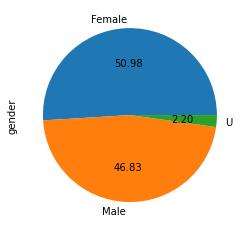

In [29]:
cd['gender'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [30]:
# Male customers are almost as much as female customers

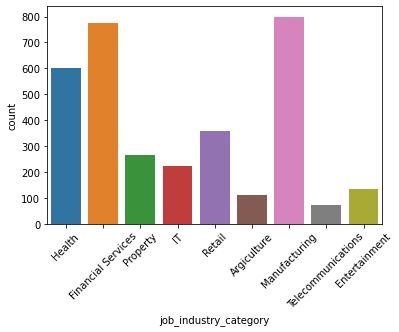

In [31]:
sns.countplot(cd['job_industry_category'])
plt.xticks(rotation=45)
plt.show()

In [32]:
# Most of the customers work in Manufacturing and Financial Services

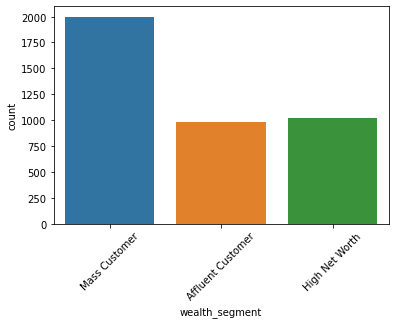

In [33]:
sns.countplot(cd['wealth_segment'])
plt.xticks(rotation=45)
plt.show()

In [34]:
# The wealth_segment columns shows us that the Mass Customers are almost double the Affluent and High net worth customers

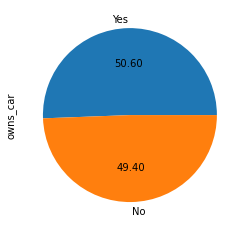

In [35]:
cd['owns_car'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [36]:
# We can understand that having a car or not would not have a substantial role in customers decision to buy a bike or not

In [37]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

#### Check the numerical values

In [38]:
num_col = []
for x in cd.dtypes.index:
    if cd.dtypes[x] != 'object':
        num_col.append(x)
num_col

['customer_id', 'past_3_years_bike_related_purchases', 'DOB', 'tenure', 'Age']

In [39]:
cd.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,Age
count,4000.000000,4000.000000,3913.000000,3913.000000
mean,2000.500000,48.890000,10.657041,44.135957
std,1154.844867,28.715005,5.660146,12.798099
min,1.000000,0.000000,1.000000,19.000000
25%,1000.750000,24.000000,6.000000,35.000000
50%,2000.500000,48.000000,11.000000,44.000000
75%,3000.250000,73.000000,15.000000,54.000000
max,4000.000000,99.000000,22.000000,178.000000


#### Check for Outliers

<AxesSubplot:>

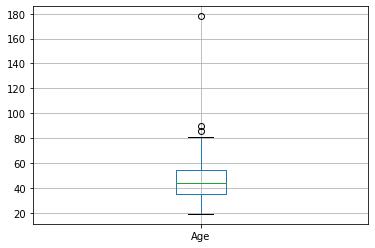

In [40]:
cd.boxplot(column=['Age'])

In [41]:
# We have 3 outliers in Age column

In [42]:
# deal with the outliers

In [43]:
min_thresh, max_thresh = cd['Age'].quantile([0.0005, 0.9995])
min_thresh, max_thresh

(20.0, 86.1760000000013)

In [44]:
cd[cd['Age']<min_thresh]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
65,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,No,1.0,19.0


In [45]:
cd[cd['Age']>max_thresh]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,178.0
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,90.0


In [46]:
# the ages 19 and 90 cant be considered as outliers however they are not impossible like the 178
# since they are only 2 we can keep them in the dataset and only replace the non-sense value of 178 with the mean of the df

In [47]:
cd = cd.replace(to_replace = {'Age' : { 178 : cd["Age"].mean()}})
cd.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,Age
count,4000.000000,4000.000000,3913.000000,3913.000000
mean,2000.500000,48.890000,10.657041,44.101747
std,1154.844867,28.715005,5.660146,12.617824
min,1.000000,0.000000,1.000000,19.000000
25%,1000.750000,24.000000,6.000000,35.000000
50%,2000.500000,48.000000,11.000000,44.000000
75%,3000.250000,73.000000,15.000000,54.000000
max,4000.000000,99.000000,22.000000,90.000000


In [48]:
# We can quickly get a sense of the distribution of ages by creating a histogram of the age variable with df.hist()

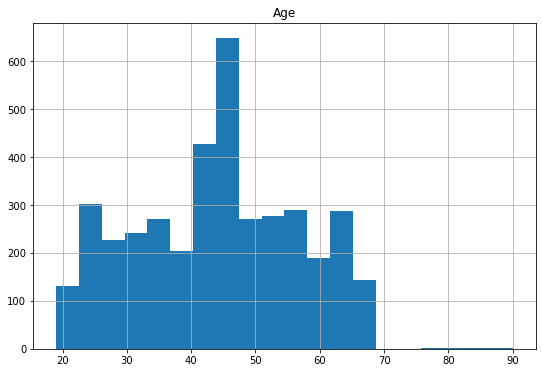

In [49]:
cd.hist(column = 'Age', figsize=(9,6), bins = 20);

In [50]:
# The age of the most customers between 40-50 years old
# The lowest customer count is 60+ and under 20 years old

In [51]:
# It is similar to a normal distribution since most of the data is near the mean, in occurrence than data far from the mean.

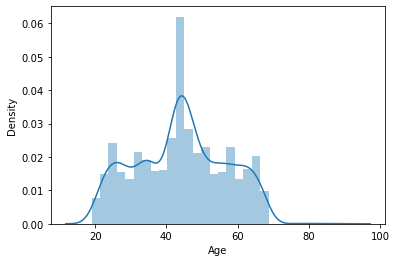

In [52]:
sns.distplot(cd['Age']) 
plt.show()

<AxesSubplot:>

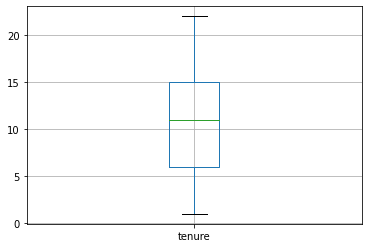

In [53]:
cd.boxplot(column=['tenure'])

In [54]:
# There are no outliers in the tenure column

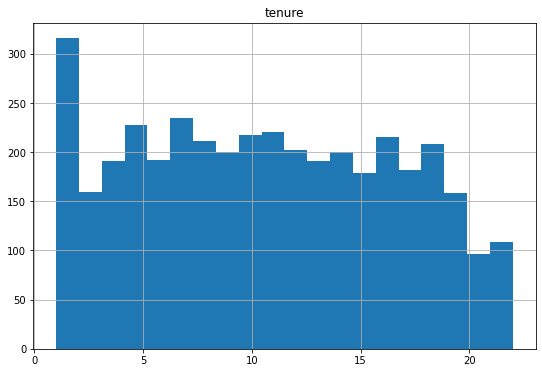

In [55]:
cd.hist(column = 'tenure', figsize=(9,6), bins = 20);

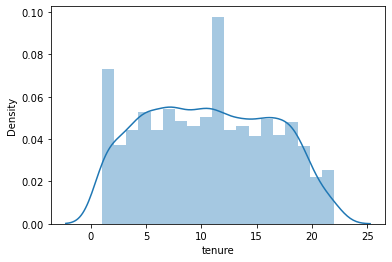

In [56]:
sns.distplot(cd['tenure']) 
plt.show()

In [57]:
# Most of the values appear the same times as the others

<AxesSubplot:>

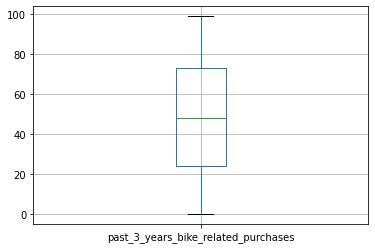

In [58]:
cd.boxplot(column=['past_3_years_bike_related_purchases'])

In [59]:
# There are not outliers in this column too

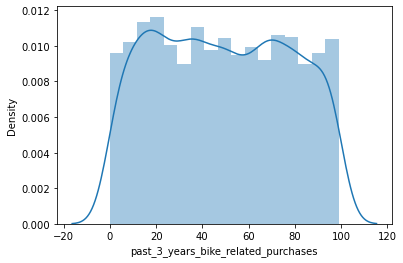

In [60]:
sns.distplot(cd['past_3_years_bike_related_purchases']) 
plt.show()

In [61]:
# We can see that here there is a Multimodal Distribution which means for further investigation we can separate the data into groups and analize it separately

#### Check for nan values

In [62]:
cd.isna().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
Age                                     87
dtype: int64

In [63]:
# The missing values are very few comparing to the dataset so we can fill them with the mean in numerical columns and the mode in categorical

In [64]:
cd['tenure'].fillna(cd['tenure'].mean(), inplace = True)

In [65]:
cd['Age'].fillna(cd['Age'].mean(), inplace = True)

In [66]:
cd['job_title'].mode()

0    Business Systems Development Analyst
dtype: object

In [67]:
cd['job_title'].fillna('Business Systems Development Analyst', inplace = True)

In [68]:
cd['job_industry_category'].mode()

0    Manufacturing
dtype: object

In [69]:
cd['job_industry_category'].fillna('Manufacturing', inplace = True)

In [70]:
cd.isna().sum()

customer_id                             0
first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    87
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
Age                                     0
dtype: int64

In [71]:
# since we got the Age column we can drop DOB

In [72]:
cd.drop(columns = 'DOB', inplace = True)

In [73]:
cd.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

## Transactions

### Explore the Data

In [74]:
tr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [75]:
tr.shape

(20000, 13)

In [76]:
tr.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

#### Check for duplicated values

In [77]:
tr.duplicated().sum()

0

In [78]:
# Add Profit column

In [79]:
tr['Profit'] = tr['list_price'] - tr['standard_cost']

In [80]:
tr.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55


In [81]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

#### Info table about the data

In [82]:
tr_info=pd.DataFrame(tr.dtypes).T.rename(index={0:'column type'})
tr_info=tr_info.append(pd.DataFrame(tr.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tr_info=tr_info.append(pd.DataFrame(tr.isnull().sum()/tr.shape[0]*100).T.rename(index={0:'null values (%)'}))
tr_info

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
column type,int64,int64,int64,datetime64[ns],float64,object,object,object,object,object,float64,float64,datetime64[ns],float64
null values (nb),0,0,0,0,360,0,197,197,197,197,0,197,197,197
null values (%),0.0,0.0,0.0,0.0,1.8,0.0,0.985,0.985,0.985,0.985,0.0,0.985,0.985,0.985


#### Check categorical values

In [83]:
categorical = []
for x in tr.dtypes.index:
    if tr.dtypes[x] == 'object':
        categorical.append(x)
categorical

['order_status', 'brand', 'product_line', 'product_class', 'product_size']

In [84]:
tr['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [85]:
tr['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [86]:
tr['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [87]:
tr['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [88]:
tr['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

#### Check the numerical values

In [89]:
tr.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,Profit
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,551.950915
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,493.412849
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,4.800000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,133.780000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,445.210000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,830.240000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,1702.550000


<AxesSubplot:>

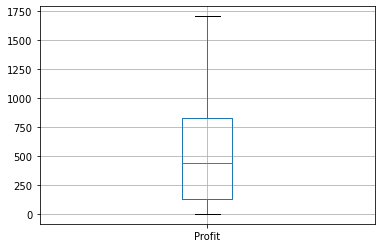

In [90]:
tr.boxplot(column=['Profit'])

### Visualisations

#### Which Product sells the most

In [91]:
tr.groupby(['product_id'])['Profit'].sum().sort_values(ascending=False).head(20)

product_id
3     602702.70
38    306142.17
57    282033.25
46    261710.60
89    250774.75
63    240150.18
12    238906.43
54    236449.72
37    236325.33
10    232885.84
68    232459.74
44    229201.44
73    224102.75
83    224016.69
55    221518.53
26    189466.20
39    187001.04
79    185572.65
35    184775.30
4     165697.21
Name: Profit, dtype: float64

In [92]:
data = {'product_id': [3, 38, 57, 46, 89, 63, 12, 54, 37, 10, 68, 44, 73, 83, 55, 26, 39, 79, 35, 4], 'Profit': [602702.70, 306142.17, 282033.25, 261710.60, 250774.75, 240150.18, 238906.43, 236449.72, 236325.33, 232885.84, 232459.74, 229201.44, 224102.75, 224016.69, 221518.53, 189466.20, 187001.04, 185572.65,184775.30,165697.21]}
p = pd.DataFrame(data)

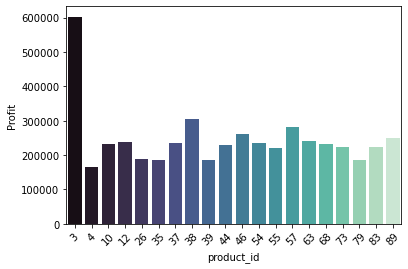

In [93]:
sns.barplot(x = 'product_id' , y='Profit', data=p, palette='mako')
plt.xticks(rotation=45);

#### Which Brand is the most Profitable

In [94]:
tr.groupby(['brand'])['Profit'].sum().sort_values(ascending=False)

brand
WeareA2B          2.753895e+06
Solex             2.413852e+06
Trek Bicycles     1.837974e+06
Giant Bicycles    1.573840e+06
OHM Cycles        1.483039e+06
Norco Bicycles    8.676838e+05
Name: Profit, dtype: float64

In [95]:
data1 = {'brand': ['WeareA2B', 'Solex', 'Trek Bicycles', 'Giant Bicycles', 'OHM Cycles', 'Norco Bicycles'], 'Profit': [2.753895e+06, 2.413852e+06, 1.837974e+06, 1.573840e+06, 1.483039e+06, 8.676838e+05]}
l = pd.DataFrame(data1)

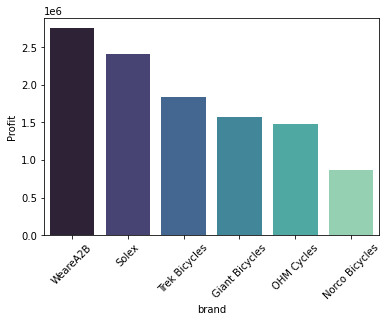

In [96]:
sns.barplot(x = 'brand', y='Profit', data=l, palette='mako')
plt.xticks(rotation=45);

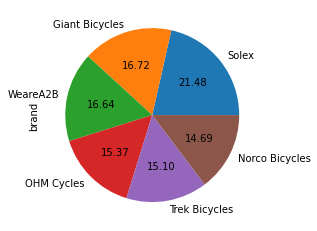

In [97]:
tr['brand'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [98]:
# WeareA2B is more profitable despite the fact that Solex has more transactions

#### Which Line is the most Profitable

In [99]:
tr.groupby(['product_line'])['Profit'].sum().sort_values(ascending=False)

product_line
Standard    8.138950e+06
Road        1.400397e+06
Touring     1.350158e+06
Mountain    4.077939e+04
Name: Profit, dtype: float64

In [100]:
data2 = {'product_line': ['Standard', 'Road', 'Touring', 'Mountain'], 'Profit': [8.138950e+06, 1.400397e+06, 1.350158e+06, 4.077939e+04]}
pl = pd.DataFrame(data2)

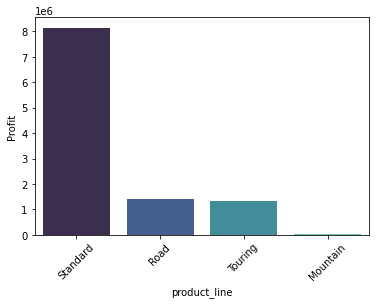

In [101]:
sns.barplot(x = 'product_line', y='Profit', data=pl, palette='mako')
plt.xticks(rotation=45);

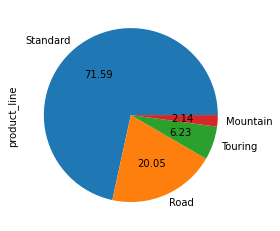

In [102]:
tr['product_line'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

#### Which Customer bought the most

In [1]:
# We going to present the first 10

In [104]:
tr.groupby(['customer_id'])['Profit'].sum().sort_values(ascending=False).head(10)

customer_id
941     11668.95
2637    11222.65
1460    10787.60
1558    10640.30
729     10497.78
3326    10422.04
322     10341.57
2770    10028.80
1597     9739.46
1887     9695.59
Name: Profit, dtype: float64

In [105]:
data3 = {'customer_id': [941, 2637, 1460, 1558, 729, 3326, 322, 2770, 1597, 1887], 'Profit': [11668.95, 11222.65, 10787.60, 10640.30, 10497.78, 10422.04, 10341.57, 10028.80, 9739.46, 9695.59 ]}
cus = pd.DataFrame(data3)

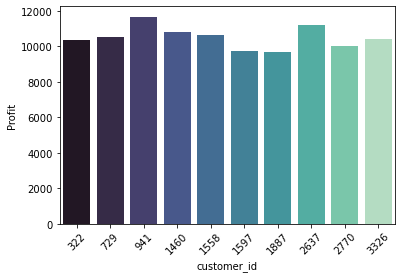

In [106]:
sns.barplot(x = 'customer_id', y='Profit', data=cus, palette='mako')
plt.xticks(rotation=45);

#### Which customer did the most transactions

In [2]:
# We going to present the first 10

In [108]:
tr.groupby(['customer_id'])['transaction_id'].count().sort_values(ascending=False).head(10)

customer_id
2476    14
2183    14
1068    14
1672    13
2548    13
2912    13
637     13
3232    13
2464    13
1302    13
Name: transaction_id, dtype: int64

In [109]:
data4 = {'customer_id': [2476,2183,1068,1672,2548,2912,637,3232,2464,1302], 'Number of Transactions': [14,14,14,13,13,13,13,13,13,12 ]}
cus1 = pd.DataFrame(data4)

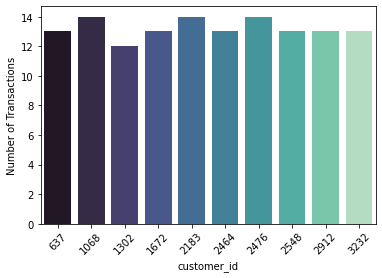

In [110]:
sns.barplot(x = 'customer_id', y='Number of Transactions', data=cus1, palette='mako')
plt.xticks(rotation=45);

#### 10 most profitable dates

In [111]:
tr.groupby(['transaction_date'])['Profit'].sum().sort_values(ascending=False).head(10)

transaction_date
2017-12-19    49003.31
2017-02-14    44713.32
2017-03-08    43889.00
2017-10-15    43359.04
2017-08-18    43019.92
2017-07-09    42589.98
2017-10-10    42264.26
2017-05-09    41987.42
2017-11-17    41657.65
2017-11-01    41578.69
Name: Profit, dtype: float64

#### Online vs Offline orders

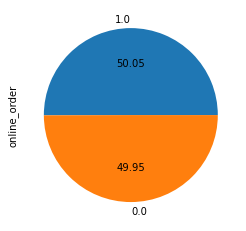

In [112]:
tr['online_order'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [113]:
tr.groupby(['online_order'])['Profit'].sum()

online_order
0.0    5.387900e+06
1.0    5.340917e+06
Name: Profit, dtype: float64

In [114]:
# offline orders as profitable as online orders

In [115]:
tr.groupby(['brand'])['online_order'].sum().sort_values(ascending = False)

brand
Solex             2047.0
Giant Bicycles    1640.0
WeareA2B          1615.0
OHM Cycles        1560.0
Trek Bicycles     1460.0
Norco Bicycles    1417.0
Name: online_order, dtype: float64

In [116]:
# Brand with the most online orders is Solex

#### Find the missing values

In [117]:
tr.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
Profit                     197
dtype: int64

In [118]:
tr.shape

(20000, 14)

In [119]:
# Drop the nan values 
# The shape of the dataframe is 20000 rows and the missing values are very few compared to this number

In [120]:
tr.dropna(axis=0, inplace = True)

In [121]:
tr.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
Profit                     0
dtype: int64

## Customer Address Sheet

### Explore the data

In [122]:
ca.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [123]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


#### Check for duplicated values

In [124]:
ca.duplicated().sum()

0

In [125]:
ca.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


#### Check for NAN values

In [126]:
ca.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

#### Deal with inconsistency

In [127]:
ca.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [128]:
ca['state'] = ca['state'].replace({'New South Wales':'NSW', 'Victoria':'VIC'})
ca['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [129]:
ca.country.value_counts()

Australia    3999
Name: country, dtype: int64

#### Finding which states has the most high value properties

In [130]:
ca.groupby(['state'])['property_valuation'].value_counts()

state  property_valuation
NSW    9                     432
       10                    411
       8                     357
       11                    227
       7                     190
       12                    160
       6                      75
       5                      71
       4                      67
       1                      64
       3                      48
       2                      38
QLD    7                     148
       8                     115
       3                      97
       4                      94
       5                      91
       6                      80
       9                      70
       2                      66
       1                      48
       10                     22
       11                      5
       12                      2
VIC    8                     174
       7                     155
       9                     145
       10                    144
       6                      83
       5         

In [131]:
NSW = {'property_valuation': [1,2,3,4,5,6,7,8,9,10,11,12], 'NSW Property': [64,38,48,67,71,75,190,357,432,411,227,160]}
nsw_prop= pd.DataFrame(NSW)

QLD = {'property_valuation': [1,2,3,4,5,6,7,8,9,10,11,12], 'QLD Property': [48,66,97,94,91,80,148,115,70,22,5,2]}
qld_prop= pd.DataFrame(QLD)

VIC = {'property_valuation': [1,2,3,4,5,6,7,8,9,10,11,12], 'VIC Property': [42,39,41,53,63,83,155,174,145,144,49,33]}
vic_prop= pd.DataFrame(VIC)

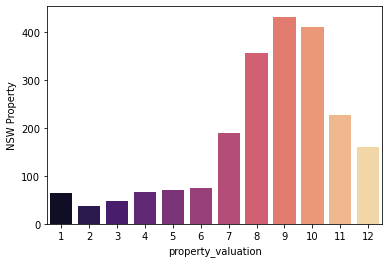

In [132]:
sns.barplot(x = 'property_valuation', y='NSW Property', data=nsw_prop, palette='magma')
plt.xticks;

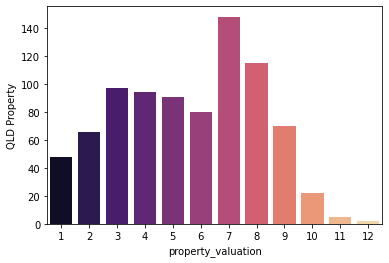

In [133]:
sns.barplot(x = 'property_valuation', y='QLD Property', data=qld_prop, palette='magma')
plt.xticks;

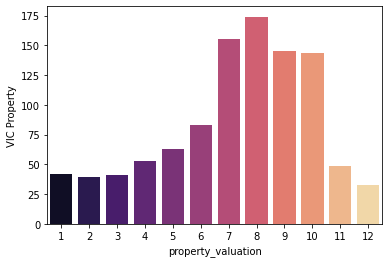

In [134]:
sns.barplot(x = 'property_valuation', y='VIC Property', data=vic_prop, palette='magma')
plt.xticks;

In [135]:
# We can see that the state with the most valuable properties is the New South Wales
# All three states have similar number of medium to high value properties
# The state with the lowest value properties is Queensland

#### Check for Correlations

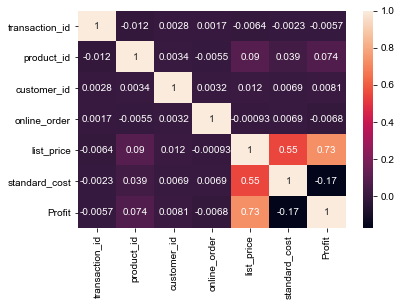

In [136]:
correlation_matrix = tr.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
sns.set(rc = {'figure.figsize':(6,3)})

plt.show()

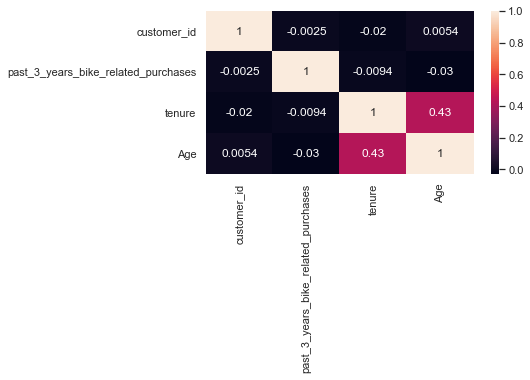

In [137]:
correlation_matrix = cd.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
sns.set(rc = {'figure.figsize':(6,3)})

plt.show()

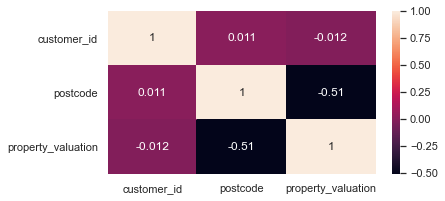

In [138]:
correlation_matrix = ca.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
sns.set(rc = {'figure.figsize':(6,3)})

plt.show()

In [139]:
# There aren't any noticeable correlations

### Merge the Dataframes

In [143]:
# Inner Join the dataframes in order to procceed in further analysis

In [148]:
# merge demographics with transactions
cus = pd.merge(cd,tr, on = 'customer_id')

In [147]:
# merge with the customer_address sheet
customers = pd.merge(cus,ca, on = 'customer_id')
customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,product_size,list_price,standard_cost,product_first_sold_date,Profit,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,medium,235.63,125.07,2005-05-10,110.56,060 Morning Avenue,2016,NSW,Australia,10
1,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,medium,1577.53,826.51,2008-03-19,751.02,060 Morning Avenue,2016,NSW,Australia,10
2,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,small,1720.70,1531.42,2003-07-21,189.28,060 Morning Avenue,2016,NSW,Australia,10
3,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,medium,360.40,270.30,2003-09-09,90.10,060 Morning Avenue,2016,NSW,Australia,10
4,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,medium,71.49,53.62,2005-08-09,17.87,060 Morning Avenue,2016,NSW,Australia,10


### Information about the dataframe

In [150]:
customers.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'Profit', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [151]:
customers.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
Profit          

In [152]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19416 entries, 0 to 19415
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19416 non-null  int64         
 1   first_name                           19416 non-null  object        
 2   last_name                            19416 non-null  object        
 3   gender                               19416 non-null  object        
 4   past_3_years_bike_related_purchases  19416 non-null  int64         
 5   job_title                            19416 non-null  object        
 6   job_industry_category                19416 non-null  object        
 7   wealth_segment                       19416 non-null  object        
 8   deceased_indicator                   19416 non-null  object        
 9   owns_car                             19416 non-null  object        
 10  tenure    

### Cohort Analysis

In [165]:
# Create the CohortMonth column (1st transaction) and the TransactionMonth column (year and month of the invoice date)

In [160]:
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [161]:
customers['TransactionMonth'] = customers['transaction_date'].apply(get_month) 

In [162]:
grouping = customers.groupby('customer_id')['TransactionMonth'] 

In [163]:
customers['CohortMonth'] = grouping.transform('min')

In [164]:
customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,standard_cost,product_first_sold_date,Profit,address,postcode,state,country,property_valuation,TransactionMonth,CohortMonth
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,125.07,2005-05-10,110.56,060 Morning Avenue,2016,NSW,Australia,10,2017-12-01,2017-01-01
1,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,826.51,2008-03-19,751.02,060 Morning Avenue,2016,NSW,Australia,10,2017-04-01,2017-01-01
2,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,1531.42,2003-07-21,189.28,060 Morning Avenue,2016,NSW,Australia,10,2017-05-01,2017-01-01
3,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,270.30,2003-09-09,90.10,060 Morning Avenue,2016,NSW,Australia,10,2017-01-01,2017-01-01
4,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,53.62,2005-08-09,17.87,060 Morning Avenue,2016,NSW,Australia,10,2017-02-01,2017-01-01


In [166]:
# Create the CohortIndex (difference between invoice month and cohort month for each row)
# With CohortIndex we know the time passed between the first and an x transaction

In [167]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [168]:
transcation_year, transaction_month, _ = get_date_int(customers, 'TransactionMonth')

In [169]:
cohort_year, cohort_month, _ = get_date_int(customers, 'CohortMonth')

In [170]:
# We will calculate the difference between the Invoice Dates and Cohort Dates in years, months separately

In [171]:
years_diff = transcation_year - cohort_year

In [172]:
months_diff = transaction_month - cohort_month

In [173]:
customers['CohortIndex'] = years_diff * 12 + months_diff  + 1

In [174]:
customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,product_first_sold_date,Profit,address,postcode,state,country,property_valuation,TransactionMonth,CohortMonth,CohortIndex
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,2005-05-10,110.56,060 Morning Avenue,2016,NSW,Australia,10,2017-12-01,2017-01-01,12
1,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,2008-03-19,751.02,060 Morning Avenue,2016,NSW,Australia,10,2017-04-01,2017-01-01,4
2,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,2003-07-21,189.28,060 Morning Avenue,2016,NSW,Australia,10,2017-05-01,2017-01-01,5
3,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,2003-09-09,90.10,060 Morning Avenue,2016,NSW,Australia,10,2017-01-01,2017-01-01,1
4,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,2005-08-09,17.87,060 Morning Avenue,2016,NSW,Australia,10,2017-02-01,2017-01-01,2


In [184]:
# Counting daily active user from each cohort
grouping = customers.groupby(['CohortMonth', 'CohortIndex'])

In [185]:
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

In [186]:
# Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'customer_id')

In [179]:
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1319
1,2017-01-01,2,464
2,2017-01-01,3,476
3,2017-01-01,4,483
4,2017-01-01,5,479


In [180]:
cohort_counts.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1319.0,464.0,476.0,483.0,479.0,462.0,492.0,502.0,478.0,500.0,471.0,494.0
2017-02-01,793.0,309.0,290.0,306.0,277.0,291.0,303.0,274.0,322.0,297.0,282.0,NaN
2017-03-01,489.0,169.0,170.0,165.0,179.0,183.0,168.0,205.0,184.0,185.0,NaN,NaN
2017-04-01,341.0,110.0,119.0,155.0,142.0,123.0,141.0,124.0,132.0,NaN,NaN,NaN
2017-05-01,214.0,87.0,77.0,86.0,70.0,73.0,72.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,127.0,48.0,45.0,51.0,49.0,46.0,52.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,83.0,29.0,31.0,33.0,39.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,54.0,18.0,23.0,18.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,25.0,7.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# In the first column we can see the active user that made their first transaction on that specific month
# In the following columns we cas see the remaining users that are still active
# The last column shows that out of the 1319 customers 494 are still active

### Calculate business metrics: Retention rate

In [ ]:
# The retention rate is the percentage of active customers compared to the total number of customers after a specific time interval

In [181]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.2,36.1,36.6,36.3,35.0,37.3,38.1,36.2,37.9,35.7,37.5
2017-02-01,100.0,39.0,36.6,38.6,34.9,36.7,38.2,34.6,40.6,37.5,35.6,NaN
2017-03-01,100.0,34.6,34.8,33.7,36.6,37.4,34.4,41.9,37.6,37.8,NaN,NaN
2017-04-01,100.0,32.3,34.9,45.5,41.6,36.1,41.3,36.4,38.7,NaN,NaN,NaN
2017-05-01,100.0,40.7,36.0,40.2,32.7,34.1,33.6,37.9,NaN,NaN,NaN,NaN
2017-06-01,100.0,37.8,35.4,40.2,38.6,36.2,40.9,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,34.9,37.3,39.8,47.0,30.1,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,33.3,42.6,33.3,27.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,28.0,32.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
# # The retention Rate dataframe represents customers retained across Cohorts

In [182]:
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='CohortMonth')

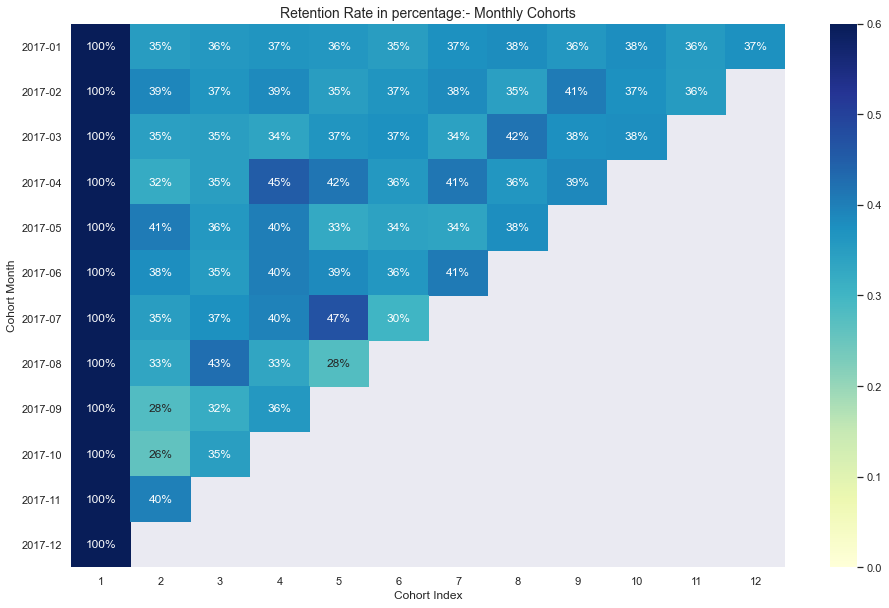

In [189]:
plt.figure(figsize=(16, 10))
plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize = 14)

# Creating the seaborn based heatmap
sns.heatmap(retention, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

In [ ]:
# We have 12 cohorts for each month and 12 cohort indexes. The darker the blue shades the higher the values. 
# Thus, if we see in 2017-07 cohort Month in 5th Cohort Index, we see the dark blue shade with 47% which means that 47% of cohorts that signed in July 2017 were active 5 months later.

In [191]:
# We can create cohorts for list price and standard cost and find the average list price and the average standard cost for every month in a specific time period